# WorkShop

The first thing we are going to do to carry out a good analysis is to import the necessary python libraries to allow us to do this. In this case we will use Pandas to first convert the database into a Dataframe and thus be able to carry out a good analysis. In addition, we will import the MatPlotLib library, which is what will allow us to carry out all the data visualizations.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Afterwards, what we will do is import the necessary libraries to be able to connect to the file where we connect our project with the database that we have saved in PostgreSqL.

In [3]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from db_conexion import establecer_conexion

We proceed to define some variables, which will make it possible for us to extract the data from the database that we have, in this case, the variable conn, what it does is extract the database. With the cursor variable, what allows us to go through the data in our database, and finally, we create a query that allows us to create an SQL function to be able to extract the entire table, and then save it in a DataFrame and be able to do everything the possible analysis and visualization.

In [4]:
conn, cursor = establecer_conexion()

# Consulta SQL para seleccionar los datos
query = "SELECT * FROM candidates"

# Leer los datos en un DataFrame de pandas
df = pd.read_sql_query(query, conn)

Conexion exitosa a la base de datos


C:\Users\juanm\AppData\Local\Temp\ipykernel_34200\2883101749.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [35]:
# Primeros datos
print(df.head())

# Ultimos datos
print(df.tail())

# Info del df
print(df.info())

# Descripción del df
print(df.describe())

# Saber si hay datos nulos
print(df.isnull().sum())

# Buscar datos repetidos
print(df.duplicated().sum())

   First Name   Last Name                      Email Application Date  \
0  Bernadette   Langworth        leonard91@yahoo.com       2021-02-26   
1      Camryn    Reynolds        zelda56@hotmail.com       2021-09-09   
2       Larue      Spinka   okey_schultz41@gmail.com       2020-04-14   
3        Arch      Spinka     elvera_kulas@yahoo.com       2020-10-01   
4       Larue  Altenwerth  minnie.gislason@gmail.com       2020-05-20   

   Country  YOE  Seniority                         Technology  \
0   Norway    2     Intern                      Data Engineer   
1   Panama   10     Intern                      Data Engineer   
2  Belarus    4  Mid-Level                     Client Success   
3  Eritrea   25    Trainee                          QA Manual   
4  Myanmar   13  Mid-Level  Social Media Community Management   

   Code Challenge Score  Technical Interview Score  Application Year  
0                     3                          3              2021  
1                     2     

After having the data as a Pandas DataFrame, we proceed to perform the analysis and the necessary visualizations that were requested.

As a first visualization, we have a Pie Chart with the total number of technologies in our database, so we proceed to do an analysis that allows us to extract the total amount of each technology and we save this in 2 variables called "num_technologies" and "technologies".

After having the 2 variables ready, we use the MatPlotLib library, which helps us make the graph of what we want to do, in this case, we give it the code to give us a Pie Chart of the technologies that exist in the table with its respective percentage.

In [15]:
# Contar la cantidad de tecnologias y guardarlas en una variable
num_tecnologias = df['Technology'].value_counts()
tecnologias = df['Technology'].unique()

# Mostrar la cantidad de tecnologias
print(num_tecnologias, tecnologias)


Technology
Game Development                           3818
DevOps                                     3808
Social Media Community Management          2028
System Administration                      2014
Mulesoft                                   1973
Development - Backend                      1965
Development - FullStack                    1961
Adobe Experience Manager                   1954
Data Engineer                              1951
Security                                   1936
Development - CMS Frontend                 1934
Business Intelligence                      1934
Database Administration                    1933
Client Success                             1927
Design                                     1906
QA Manual                                  1902
Technical Writing                          1901
QA Automation                              1892
Sales                                      1890
Development - Frontend                     1887
Development - CMS Backend    

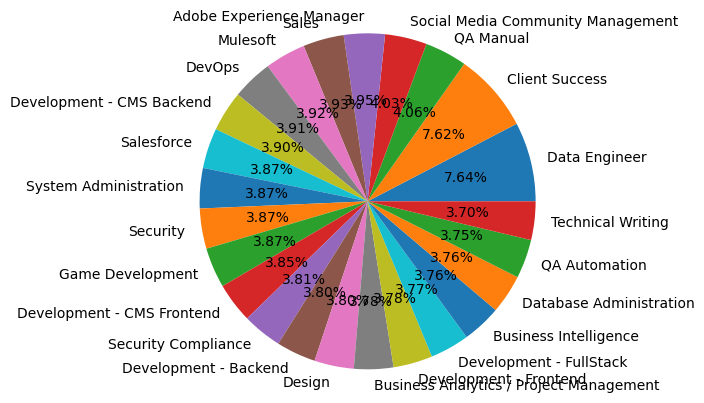

In [21]:
#Pie Chart de Tecnologías
plt.pie(num_tecnologias,  labels = tecnologias, autopct='%0.2f%%')
plt.axis("equal")
plt.show()

As a second visualization, they ask us to make a Horizontal Pie Chart of how many applications were given per year, in this case, the analysis that was carried out first was, since the 'Application Date' column was a date value, it had year parameters -month-day, so what we did was an extraction that only allowed us to see the part of the year, which was the part that we were interested in knowing, and then we counted the applications per year and saved it in the variable "applications_per_year".

Then we proceed to create the Horizontal Bar Graph that was requested, for this we use the MatPlotLib library again, which gives us the facility to do this, to show as a final result the total number of applications that were applied per year .

In [17]:
df['Application Year'] = pd.to_datetime(df['Application Date']).dt.year
applications_per_year = df['Application Year'].value_counts().sort_index()

print(applications_per_year)


Application Year
2018    11061
2019    11009
2020    11237
2021    11051
2022     5642
Name: count, dtype: int64


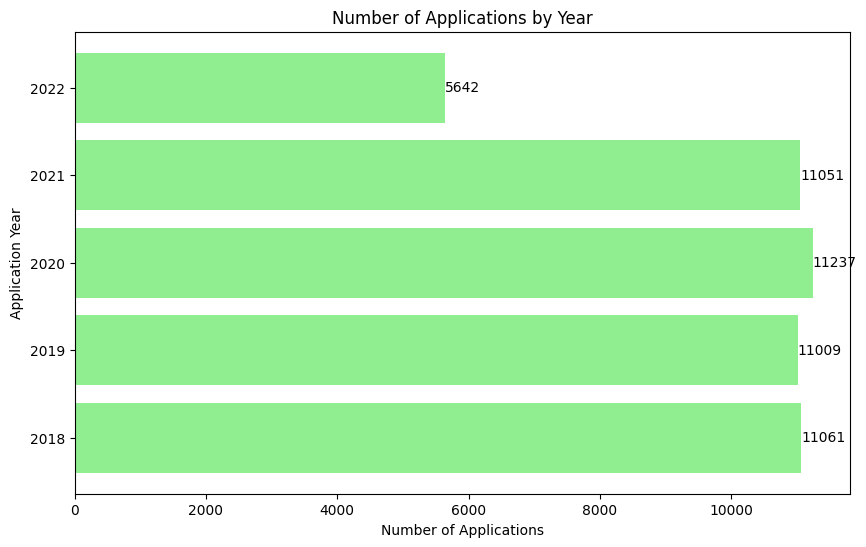

In [39]:
plt.figure(figsize=(10, 6))
bars = plt.barh(applications_per_year.index, applications_per_year.values, color='lightgreen')
plt.xlabel('Number of Applications')
plt.ylabel('Application Year')
plt.title('Number of Applications by Year')
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, str(int(width)),
             va='center', ha='left')
plt.show()

As a third graph, they ask us to make a Bar Chart of the 'Seniority' variable, so, as was done in the first graph, the only thing we do is take from the variable the total amount of each data item that we have in the table, and we save this result in a variable named "seniority".

After this, we make the code with MatPlotLib to be able to make the necessary bar graph, which allows us to have as a final result, the number of applications given by age.

In [22]:
seniority = df['Seniority'].value_counts()

print(seniority)


Seniority
Intern       7255
Mid-Level    7253
Trainee      7183
Junior       7100
Architect    7079
Lead         7071
Senior       7059
Name: count, dtype: int64


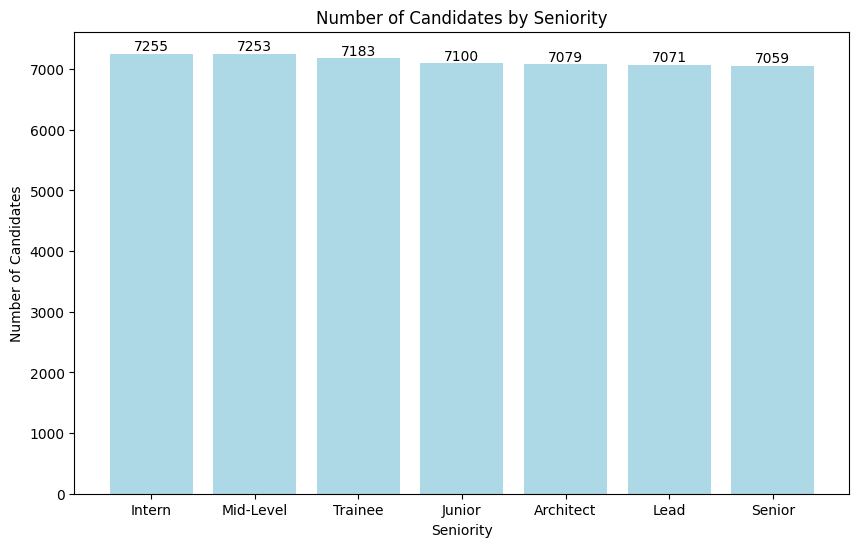

In [38]:
plt.figure(figsize=(10, 6))
bars = plt.bar(seniority.index, seniority.values, color='lightblue')
plt.xlabel('Seniority')
plt.ylabel('Number of Candidates')
plt.title('Number of Candidates by Seniority')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, str(int(yval)),
             va='bottom', ha='center')
plt.show()

Finally, they ask us to make a Multiline Chart of the applications per year but only from certain countries (USA, Brazil, Colombia and Ecuador)

The first thing we do is the same as what we did in graph 2, which is to make a filter for 'Application Date' that only takes out the part of the year, then, we define a tuple with the countries previously required, then we verify the existence of these countries in the 'Country' column in our database, and then group these 2 parameters in a variable called "applications_per_year_country"

We proceed to make the necessary code for the graph, which shows us as a final result, the number of applications that were given per country as the years go by.

In [24]:
df['Application Year'] = pd.to_datetime(df['Application Date']).dt.year
countries_of_interest = ['United States of America', 'Brazil', 'Colombia', 'Ecuador']
filtered_df = df[df['Country'].isin(countries_of_interest)]
applications_per_year_country = filtered_df.groupby(['Application Year', 'Country']).size().unstack(fill_value=0)

print(applications_per_year_country)


Country           Brazil  Colombia  Ecuador  United States of America
Application Year                                                     
2018                  52        46       40                        40
2019                  40        51       57                        39
2020                  43        62       42                        44
2021                  47        45       43                        44
2022                  22        22       21                        21


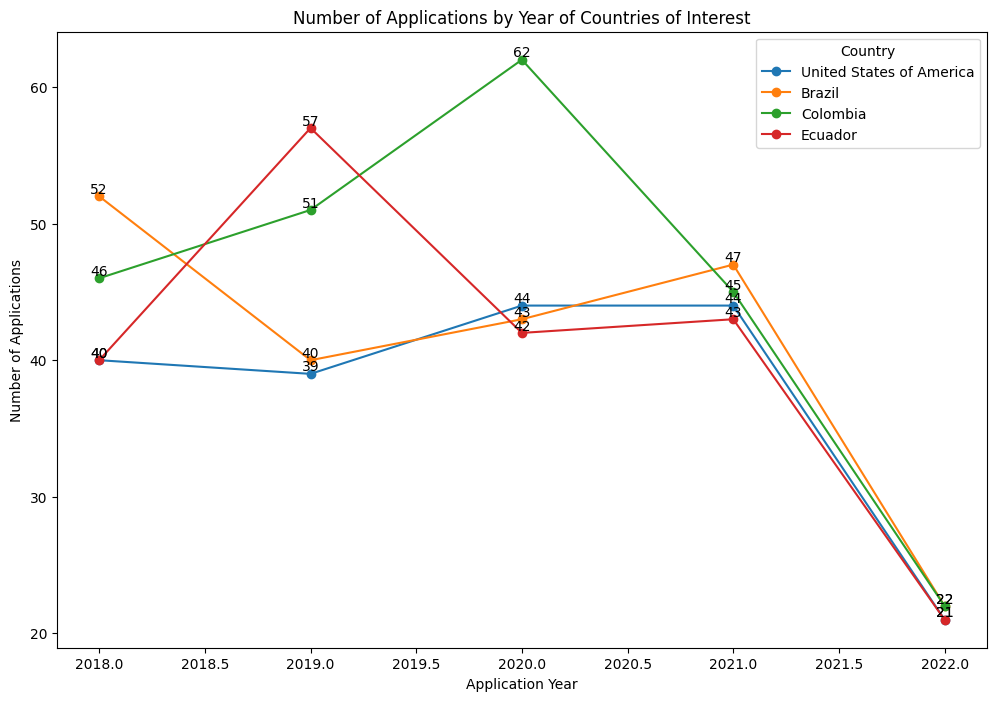

In [37]:
plt.figure(figsize=(12, 8))
for country in countries_of_interest:
    plt.plot(applications_per_year_country.index, applications_per_year_country[country], marker='o', label=country) 
    for year, value in zip(applications_per_year_country.index, applications_per_year_country[country]):
        plt.text(year, value, str(value), va='bottom', ha='center')
plt.xlabel('Application Year')
plt.ylabel('Number of Applications')
plt.title('Number of Applications by Year of Countries of Interest')
plt.legend(title='Country')
plt.show()